In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\vedant\Downloads\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df = pd.get_dummies(df, columns=['cp','restecg','slope','ca','thal'], drop_first=True)

In [6]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,False,...,False,False,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,False,...,False,False,False,False,False,False,False,False,False,True
3,61,1,148,203,0,161,0,0.0,0,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,1,106,0,1.9,0,False,...,False,True,False,False,False,True,False,False,True,False


In [7]:
dummy_cols = [col for col in df.columns if 'cp_' in col or 'restecg_' in col or 'slope_' in col or 'ca_' in col or 'thal_' in col]

In [8]:
df[dummy_cols]= df[dummy_cols].astype(int)

In [9]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

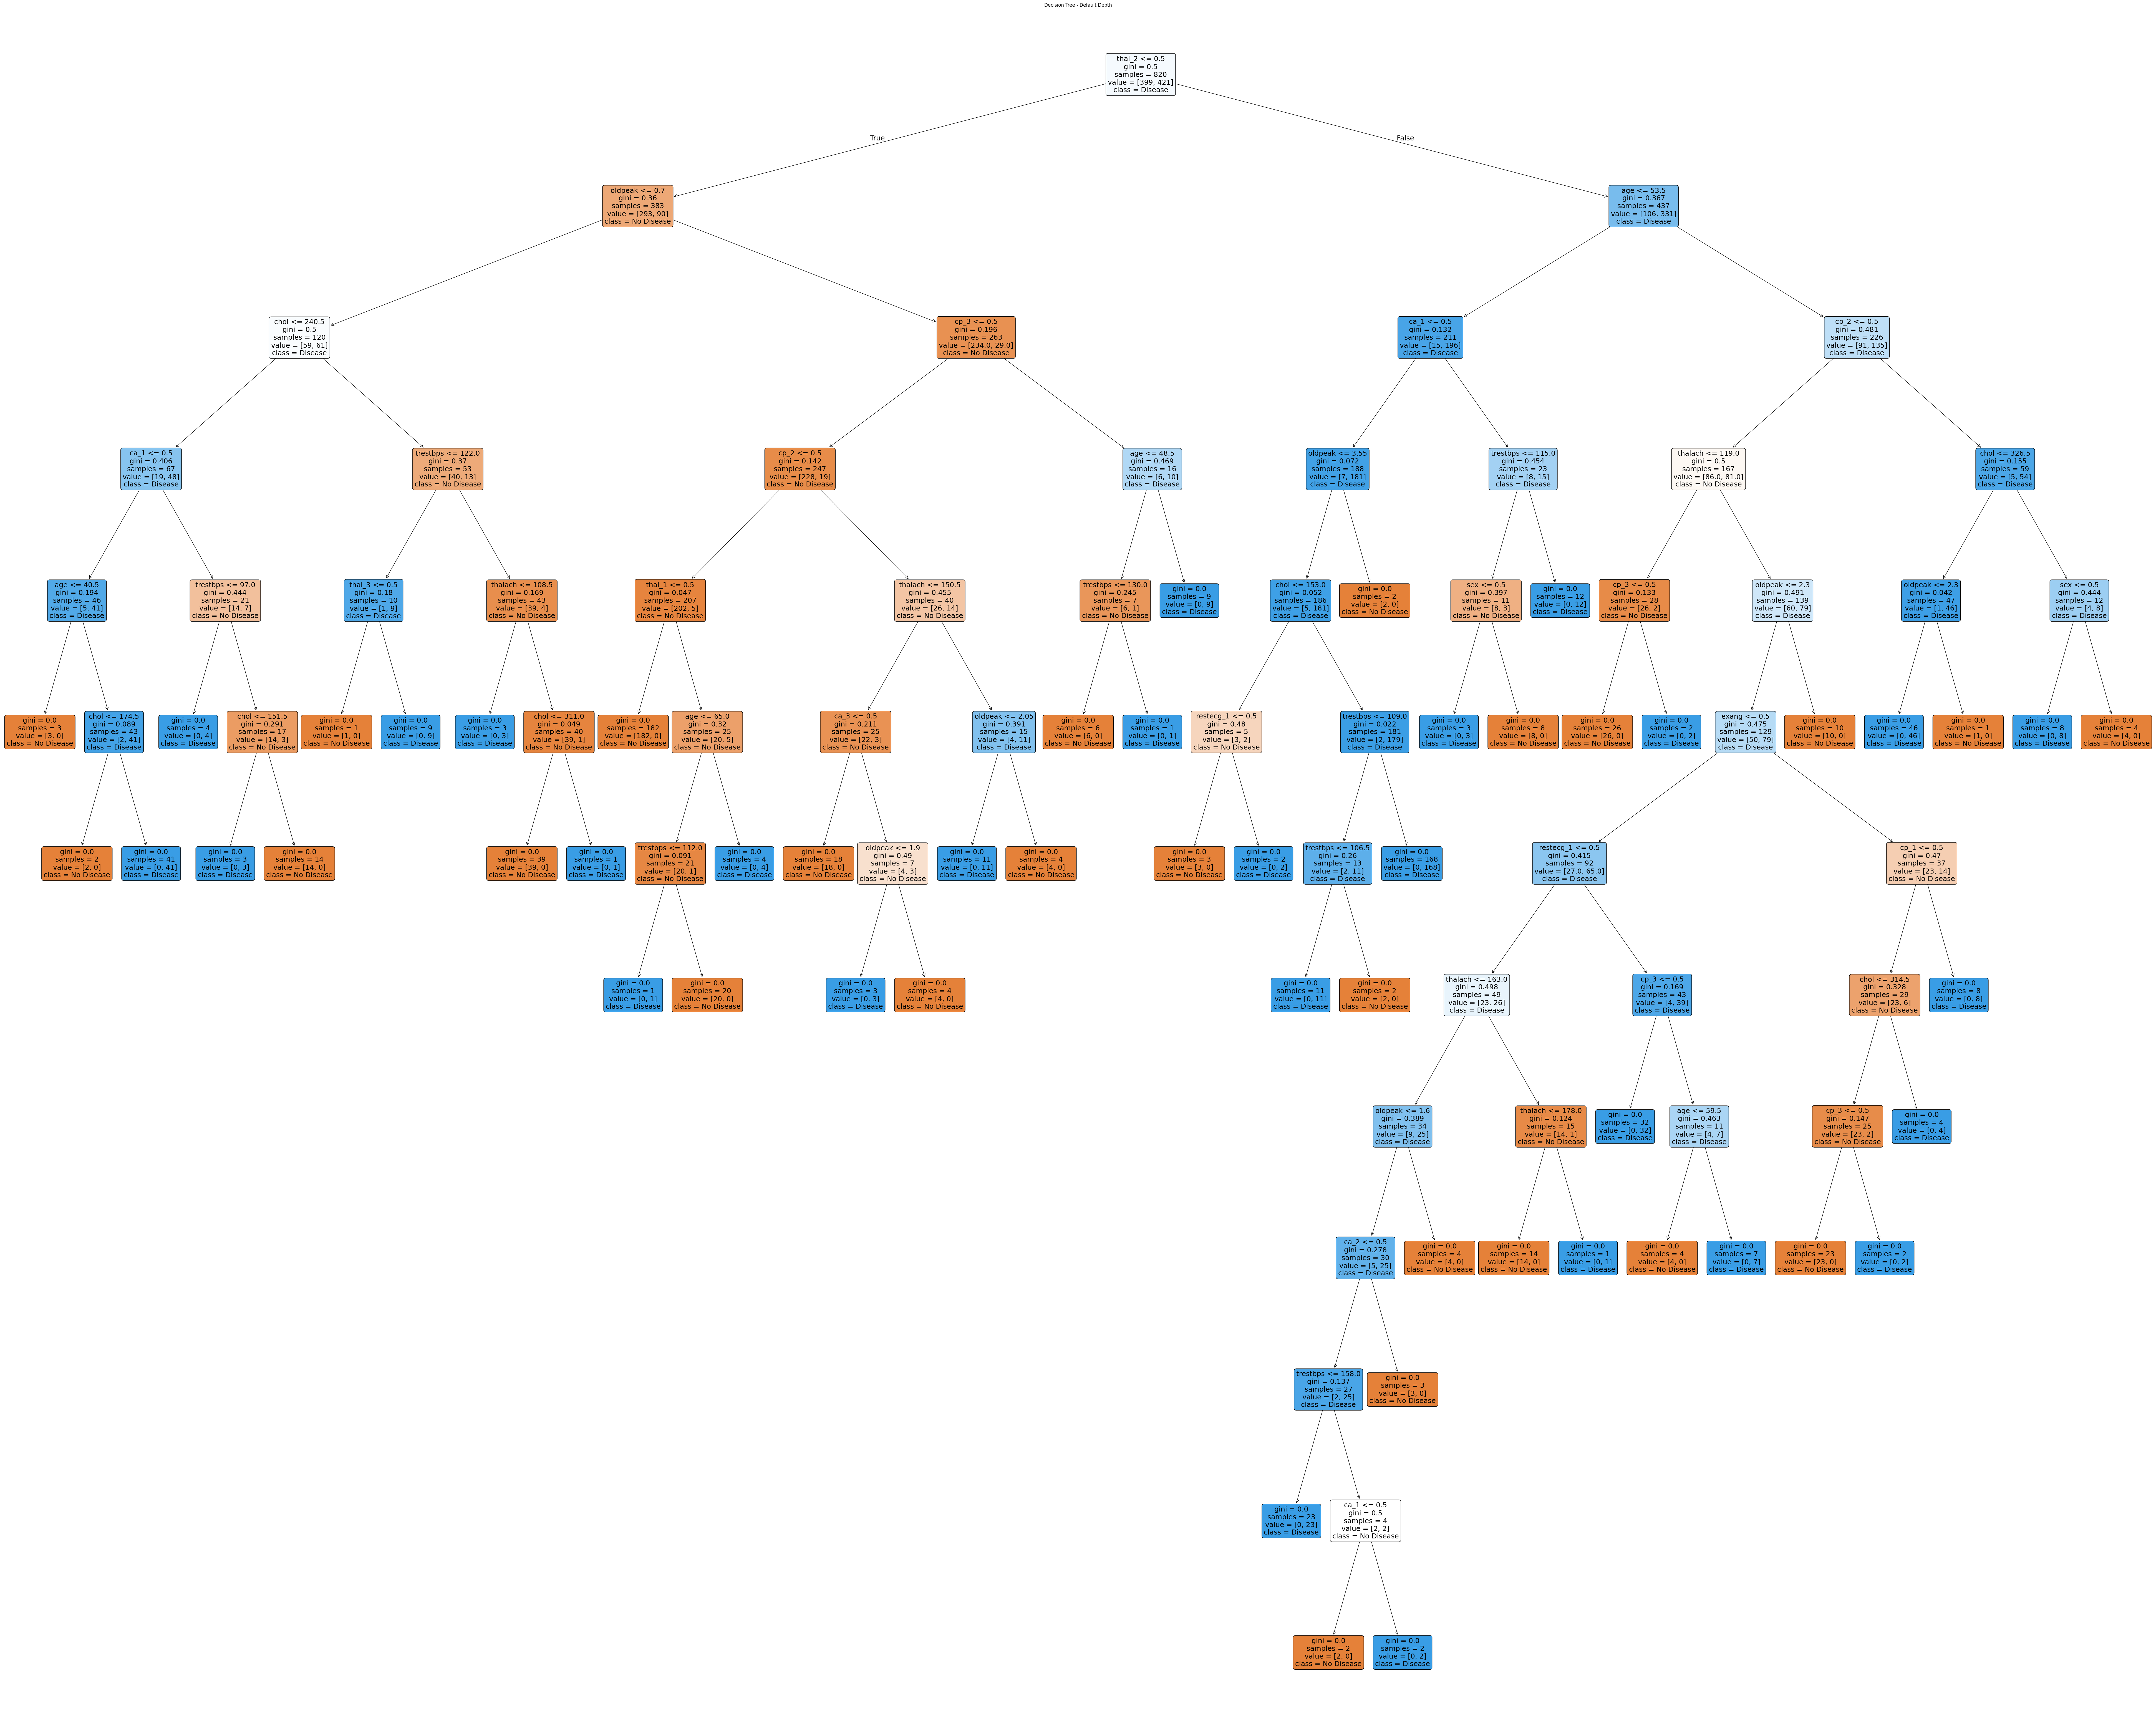

In [18]:
plt.figure(figsize=(100,80))
plot_tree(clf, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, rounded=True, fontsize=18)
plt.title("Decision Tree - Default Depth")
plt.show()

In [19]:
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Accuracy: 1.0


In [20]:
train_acc = []
test_acc = []
depth_range = range(1, 20)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

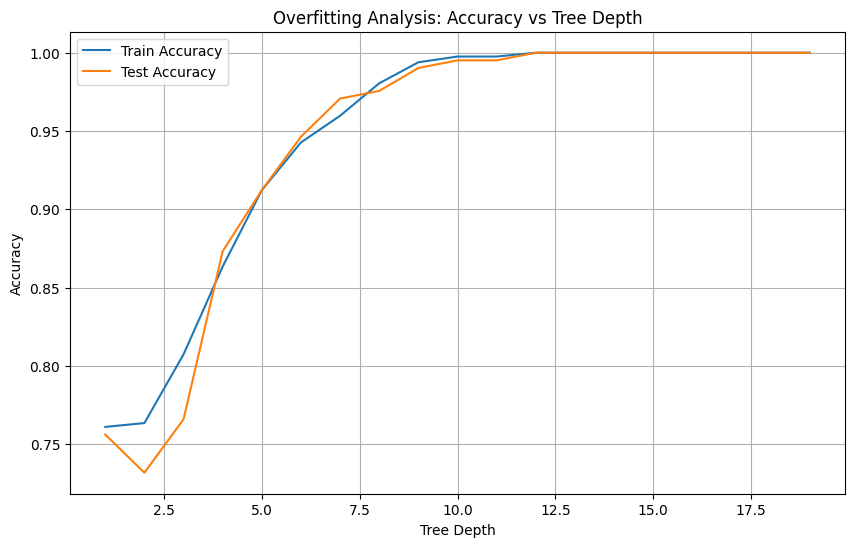

In [21]:
plt.figure(figsize=(10,6))
plt.plot(depth_range, train_acc, label="Train Accuracy")
plt.plot(depth_range, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis: Accuracy vs Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

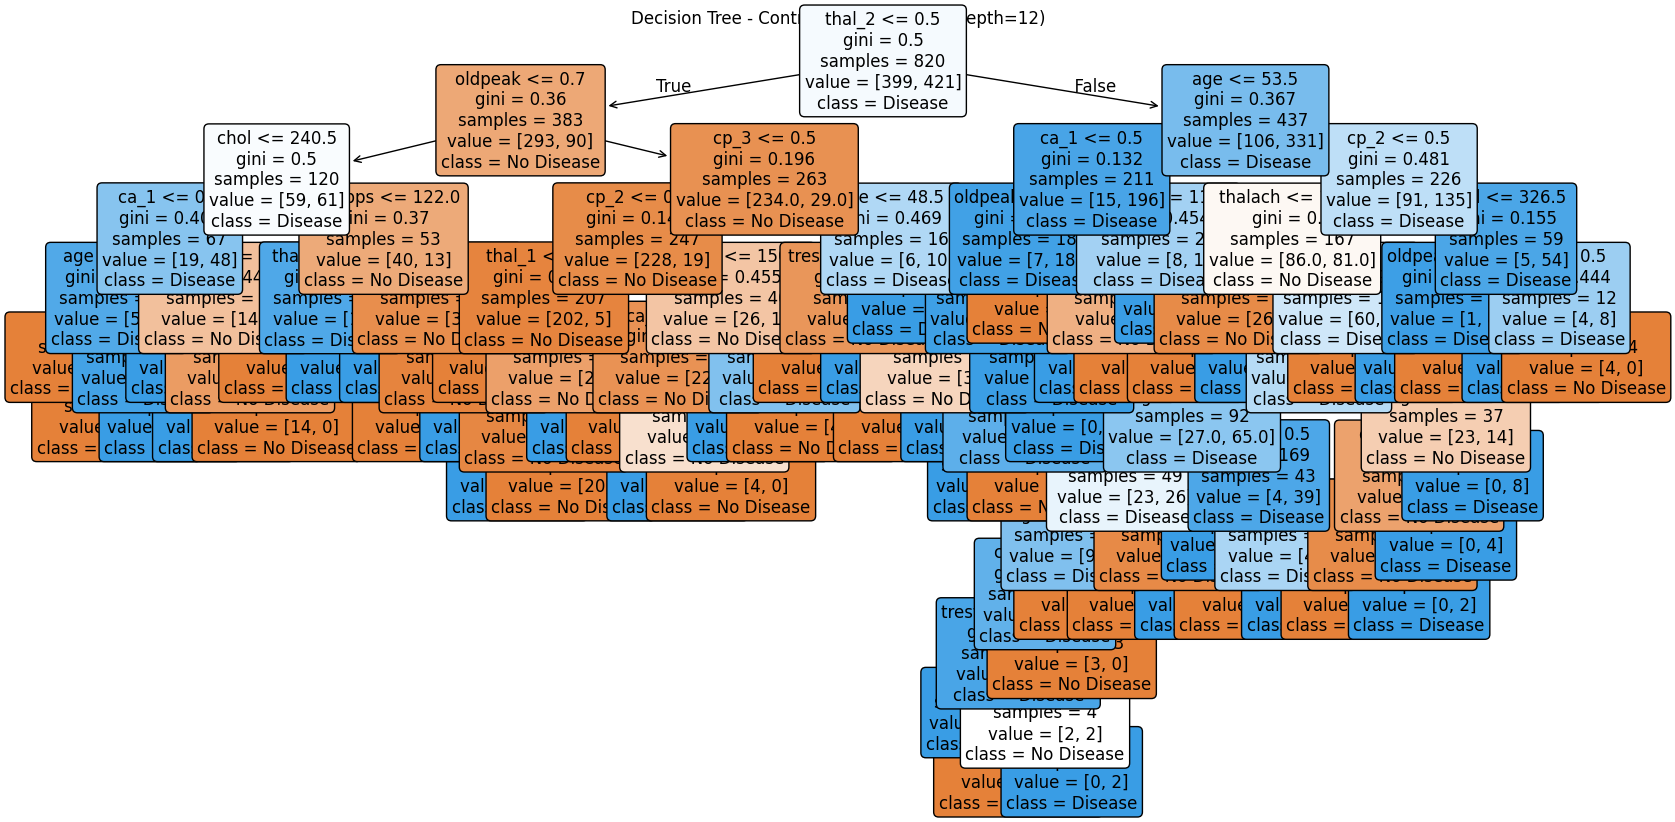

In [22]:
best_depth = test_acc.index(max(test_acc)) + 1
final_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_model.fit(X_train, y_train)

# Final Visualization
plt.figure(figsize=(20,10))
plot_tree(final_model, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, rounded=True, fontsize=12)
plt.title(f"Decision Tree - Controlled Depth (max_depth={best_depth})")
plt.show()

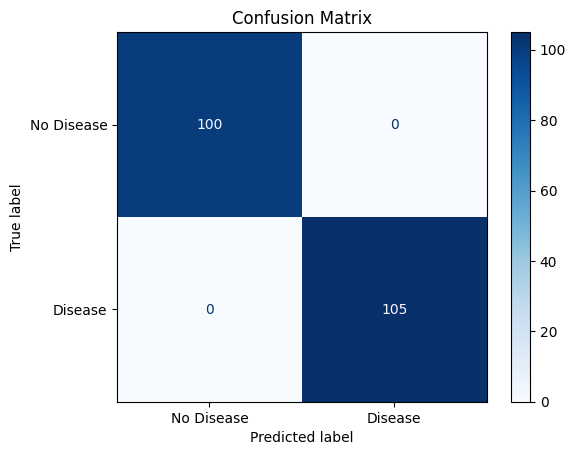

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, final_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with default parameters
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate accuracy
train_acc = rf_clf.score(X_train, y_train)
test_acc = rf_clf.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 1.00
Test Accuracy: 1.00


In [25]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())

Cross-validation scores: [1.         1.         0.97073171 0.98536585 0.98536585]
Average CV accuracy: 0.9882926829268293


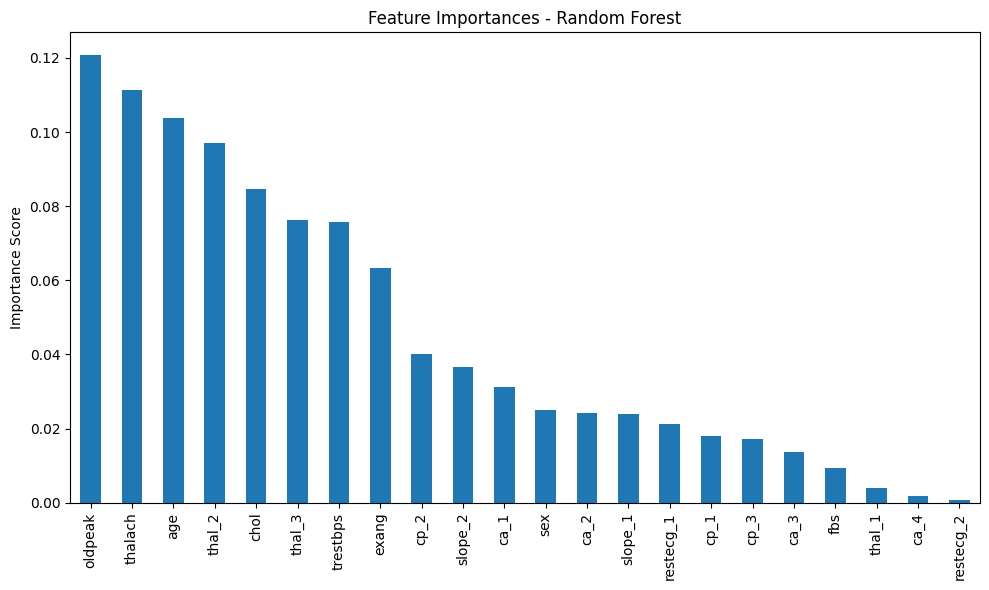

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_clf.feature_importances_
features = X.columns

# Sort and plot
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()